### About U.S. Cancer Statistics
#### U.S. Cancer Statistics (USCS): The Official Federal Cancer Statistics.The United States Cancer Statistics are the official government statistics on cancer. These statistics include cancer registry data from CDC’s National Program of Cancer Registries (NPCR) and the National Cancer Institute’s (NCI) Surveillance, Epidemiology, and End Results (SEER) Program,external icon as well as mortality data from CDC’s National Center for Health Statistics. The statistics provide information on newly diagnosed cancer cases and cancer deaths for the whole U.S. population.

This national coverage enables the public, including researchers, clinicians, policy makers, and public health professionals, to—

- Monitor populations most affected by cancer.
- Evaluate the success of programs designed to prevent cancer and diagnose cancer at early stages.
- Identify additional needs for cancer prevention and control efforts at national, state, and local levels.

#### National Program of Cancer Registries (NPCR)

The CDC-funded NPCR is a population-based surveillance system of cancer registries established in 1992. NPCR supports the collection of high-quality data by central cancer registries through funding, technical assistance, and the development of software for collecting and processing data. NPCR works to release the data in accessible, discoverable, and usable formats. Through NPCR, CDC supports central cancer registries in 46 states, the District of Columbia, Puerto Rico, the U.S. Pacific Island Jurisdictions, and the U.S. Virgin Islands.

#### Surveillance, Epidemiology, and End Results (SEER) Program
The NCI-funded SEER Program was established in 1973 and is a population-based surveillance system that collects data from various cancer registries. SEER is an authoritative source of information on cancer incidence and survival in the United States. SEER collects and publishes cancer incidence and survival data from population-based cancer registries in 20 U.S. geographic areas, including 5 states.

Researchers, clinicians, cancer registrars, public health officials, legislators, policy makers, community groups, and members of the public use SEER data to—

- Evaluate cancer prevention and screening programs and the quality of cancer care.
- Document racial and sex disparities.
- Demonstrate the effectiveness of public health interventions.
- Guide the translation of research into health policy and practice.

The package contains eleven ASCII files and a SAS input program.

Eleven ASCII files have been created from the 1999-2016 U.S. Cancer Statistics data, shown as below. All datasets are used "|" as a delimiter and blank is used to stand for missing. Additionally, these files have complementary cell suppression and the suppression at states' request applied.

In [177]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Cancer Types Grouped by County (ByArea_County)
BYAREA_COUNTY = pd.read_csv('BYAREA_COUNTY.TXT', delimiter = '|')

# #Cancer Types Grouped by Race and Ethnicity (BySite)
# BYSITE = pd.read_csv('BYSITE.TXT', delimiter = '|')

# #Childhood Cancer Detailed by Primary Cancer Site Groups and Age (0-14, 0-19) (ChildByAge_Adj)
# CHILDBYAGE_ADJ = pd.read_csv('CHILDBYAGE_ADJ.TXT', delimiter = '|')

# #Childhood Cancer Detailed by Primary Cancer Site Groups and Age (<1, 1-4, 5-9, 10-14, 15-19) (ChildByAge_cr)
# CHILDBYAGE_CR  = pd.read_csv('CHILDBYAGE_CR.TXT', delimiter = '|')

# #Childhood Cancer Detailed by Primary Cancer Site Groups (ChildBySite)
# CHILDBYSITE  = pd.read_csv('CHILDBYSITE.TXT', delimiter  = '|')

# #Childhood Cancer Detailed by ICCC Group and Age (0-14, 0-19) (ICCCByAge_adj)
# ICCCBYAGE_ADJ = pd.read_csv('ICCCBYAGE_ADJ.TXT', delimiter  = '|')

# #Childhood Cancer Detailed by ICCC Group and Age (<1, 1-4, 5-9, 10-14, 15-19) (ICCCByAge_cr)
# ICCCBYAGE_CR = pd.read_csv('ICCCBYAGE_CR.TXT', delimiter = '|')

# #Childhood Cancer Detailed by ICCC group (ICCCBySite)
# ICCCBYSITE = pd.read_csv('ICCCBYSITE.TXT', delimiter = '|')

#EXCEL file associated with this data
# Data_Dict =  pd.read_excel('Data Dictionary USCS ASCII 1999-2016.xlsx')


# ICCCBYAGE = pd.read_csv('ICCCBYAGE_ADJ.TXT', delimiter = '|')

# #Brain Cancers by Tumor Type (BrainBySite)
# BRAINBYSITE = pd.read_csv('BRAINBYSITE.TXT', delimiter = '|')

# #Cancer Types Grouped by Age, Race, and Ethnicity (ByAge)
# BYAGE = pd.read_csv('BYAGE.TXT', delimiter = '|')

# #Cancer Types Grouped by State and Region (ByArea)
# BYAREA = pd.read_csv('BYAREA.TXT', delimiter = '|')

In [4]:
a = BYAREA_COUNTY
b = a[a.SITE == 'Melanomas of the Skin']
b = a[a.COUNT != "~"]
c = b[b.COUNT != "."]
d = c[c.SITE == 'Melanomas of the Skin']
e = d[d.COUNT != "+"]
# e['%CANCER'] = e['COUNT']/e['POPULATION']*100 hamid said this to up the values
incidence  = e[e.EVENT_TYPE  == 'Incidence']

all_gender = incidence[incidence.SEX ==  "Male and Female"]
males = incidence[incidence.SEX ==  "Male"]
male = males[males.RACE == "All Races"]

females = incidence[incidence.SEX ==  "Female"]
female = females[females.RACE == "All Races"]

totals = all_gender[all_gender.RACE == "All Races"]

white = all_gender[all_gender.RACE == "White"]
hispanic = all_gender[all_gender.RACE == 'Hispanic']
black = all_gender[all_gender.RACE == 'Black']
asian = all_gender[all_gender.RACE == 'Asian/Pacific Islander']
AI  = all_gender[all_gender.RACE == 'American Indian/Alaska Native']

RACES: 'All Races', 'White', 'Hispanic', 'Black', 'Asian/Pacific Islander', 'American Indian/Alaska Native' 

### Incidence

In [5]:
# totals
print(len(female))
print(len(male))
print(len(hispanic))
print(len(black))
print(len(white))
print(len(asian))
print(len(AI))
print(len(totals))

# asian.groupby('COUNT').count()
totals

1343
1343
250
15
2081
139
315
2105


,STATE,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE
1900,AK,AK: Anchorage Municipality (02020) - 1990+,14.3,19.0,16.5,217,Incidence,1495291.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,12.6,16.6,14.5
6340,AK,AK: Fairbanks North Star Borough (02090) - 1990+,10.5,18.4,14.1,64,Incidence,500805.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,9.8,16.3,12.8
9004,AK,AK: Juneau City and Borough (02110) - 1990+,12.7,26.9,18.8,34,Incidence,162472.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,14.5,29.2,20.9
9892,AK,AK: Kenai Peninsula Borough (02122) - 1990+,7.1,15.4,10.6,32,Incidence,288098.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,7.6,15.7,11.1
13444,AK,AK: Matanuska-Susitna Borough (02170) - 1990+,14.6,23.4,18.6,82,Incidence,492825.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,13.2,20.7,16.6
28540,AL,AL: Autauga County (01001),23.1,35.8,28.9,88,Incidence,274602.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,25.7,39.5,32.0
29428,AL,AL: Baldwin County (01003),28.4,34.9,31.5,403,Incidence,994220.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,36.7,44.7,40.5
30316,AL,AL: Barbour County (01005),7.6,20.1,12.7,20,Incidence,132909.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,9.2,23.2,15.0
31204,AL,AL: Bibb County (01007),7.5,21.2,13.1,17,Incidence,112888.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,8.8,24.1,15.1
32092,AL,AL: Blount County (01009),18.4,29.5,23.5,77,Incidence,287916.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,21.1,33.4,26.7


In [6]:
import re

def fips_search(area):
    m = re.search('\((.+)\)', area)
    if m:
        return m.group(1)
    return "Not Found"


def county_search(area):
    n = re.search(':(.+)\(', area)
    if n:
        return n.group(1)
    return "Not Found"
# a["COUNTY_NAME"] = a['AREA'].apply(county_search)

In [7]:
totals["FIPS"] = totals['AREA'].apply(fips_search)
totals['COUNTY_FIPS'] = totals['FIPS'].astype(int)
totals["CANCER_COUNT"] = totals["COUNT"].astype(int)
totals.drop('FIPS', axis = 1, inplace = True)
totals.drop('COUNT', axis = 1, inplace = True)
totals["% Melanoma"] = totals["CANCER_COUNT"]/totals["POPULATION"]
totals

/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,STATE,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE,COUNTY_FIPS,CANCER_COUNT,% Melanoma
1900,AK,AK: Anchorage Municipality (02020) - 1990+,14.3,19.0,16.5,Incidence,1495291.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,12.6,16.6,14.5,2020,217,0.000145
6340,AK,AK: Fairbanks North Star Borough (02090) - 1990+,10.5,18.4,14.1,Incidence,500805.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,9.8,16.3,12.8,2090,64,0.000128
9004,AK,AK: Juneau City and Borough (02110) - 1990+,12.7,26.9,18.8,Incidence,162472.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,14.5,29.2,20.9,2110,34,0.000209
9892,AK,AK: Kenai Peninsula Borough (02122) - 1990+,7.1,15.4,10.6,Incidence,288098.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,7.6,15.7,11.1,2122,32,0.000111
13444,AK,AK: Matanuska-Susitna Borough (02170) - 1990+,14.6,23.4,18.6,Incidence,492825.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,13.2,20.7,16.6,2170,82,0.000166
28540,AL,AL: Autauga County (01001),23.1,35.8,28.9,Incidence,274602.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,25.7,39.5,32.0,1001,88,0.000320
29428,AL,AL: Baldwin County (01003),28.4,34.9,31.5,Incidence,994220.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,36.7,44.7,40.5,1003,403,0.000405
30316,AL,AL: Barbour County (01005),7.6,20.1,12.7,Incidence,132909.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,9.2,23.2,15.0,1005,20,0.000150
31204,AL,AL: Bibb County (01007),7.5,21.2,13.1,Incidence,112888.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,8.8,24.1,15.1,1007,17,0.000151
32092,AL,AL: Blount County (01009),18.4,29.5,23.5,Incidence,287916.0,All Races,Male and Female,Melanomas of the Skin,2012-2016,21.1,33.4,26.7,1009,77,0.000267


In [8]:
import plotly.graph_objects as go
import plotly.io as pio

In [9]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [10]:
totals['CANCER_COUNT']

1900       217
6340        64
9004        34
9892        32
13444       82
28540       88
29428      403
30316       20
31204       17
32092       77
33868       18
34756      113
35644       35
36532       27
37420       46
39196       34
41860       76
42748       83
45412       63
46300       23
47188      178
48076       65
48964       28
49852       72
50740      165
51628       35
52516      149
53404       16
54292       53
55180       57
          ... 
2690290     37
2691178     54
2694730     40
2695618    102
2696506     84
2697394     33
2698282     17
2699170     17
2700058     23
2700946     18
2704060     21
2704948     48
2705836     16
2706724     20
2708500    116
2709388     20
2710276     42
2711164     16
2712052     22
2712940     16
2713828     16
2715604     52
2719156    109
2720044     30
2720932     79
2722708     44
2724484     72
2726260     45
2727148     62
2728036     31
Name: CANCER_COUNT, Length: 2105, dtype: int64

In [11]:
# fig = go.Figure(data=go.Choropleth(
#     locations= totals.index,
#     z = totals['% Melanoma'],
#     locationmode = 'USA-states',
#     colorscale = 'Reds',
#     autocolorscale = False,
#     colorbar_title = 'Cancer Incidence in Black Females by State',
# ))
# fig.update_layout(
#     title_text = 'Cancer Incidence in Black Females by State',
#     geo_scope='usa',
# )
# fig.show()

The following suppression rules are implemented in the ASCII files:
- Rates and Counts are suppressed if fewer than 16 cases were reported in a specific category ('~' assigned to count, rate, LCI, and UCI)
- Rate and Counts are suppressed if state requested suppressions for race and ethnicity ('-' assigned to count, rate, LCI, and UCI)
- Within each Race, CancerSite, Area, RateType and DataType, "Male" or "Female" counts are suppressed (supplementarily) if the counterpart sex ("Female" or "Male") is suppressed.
- Leave "Male and Female" count unchanged ('+' assigned to count due to supplementary suppression).

#### Split on UV, Compare on melanoma
Divide counties to high uv counties and low uv counties and take the average melanoma rate or each and perform a hypothesis test.

Null HO: there is no difference between melanoma incidence in counties with high UV and low UV exposure rates

Alternate HA: there is a difference between melanoma incidence in counties with high UV and low UV exposure rates

##  Mann-Whitney
##  two-tailed welch's

Reasons to use different sample sizes, or reason to believe that variance is very different or strong indication that there is no normality or skewed or kertotic data
sample sizes are more or less the same or very different AND sample variances 

In [139]:
midpoint

4277.0

In [232]:
UV = pd.read_csv('UV/uv-county.csv', delimiter = ',')
midpoint = UV["UV_ Wh/m_"].quantile(.5)

High_UV_Counties = UV[UV["UV_ Wh/m_"] >= midpoint]
Low_UV_Counties = UV[UV["UV_ Wh/m_"] < midpoint]


# HYPOTHESIS: If county is above average of high_UV counties 
# it will  have above average rates of melanoma

#HYPOTHESIS: If county is below average of low_UV counties
# it will have below average rates of melanoma
# High_UV_Counties

In [233]:
low_merged = totals.merge(Low_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
low = np.array(low_merged['% Melanoma'])

high_merged = totals.merge(High_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# # merged.drop(['AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
high = np.array(high_merged['% Melanoma'])


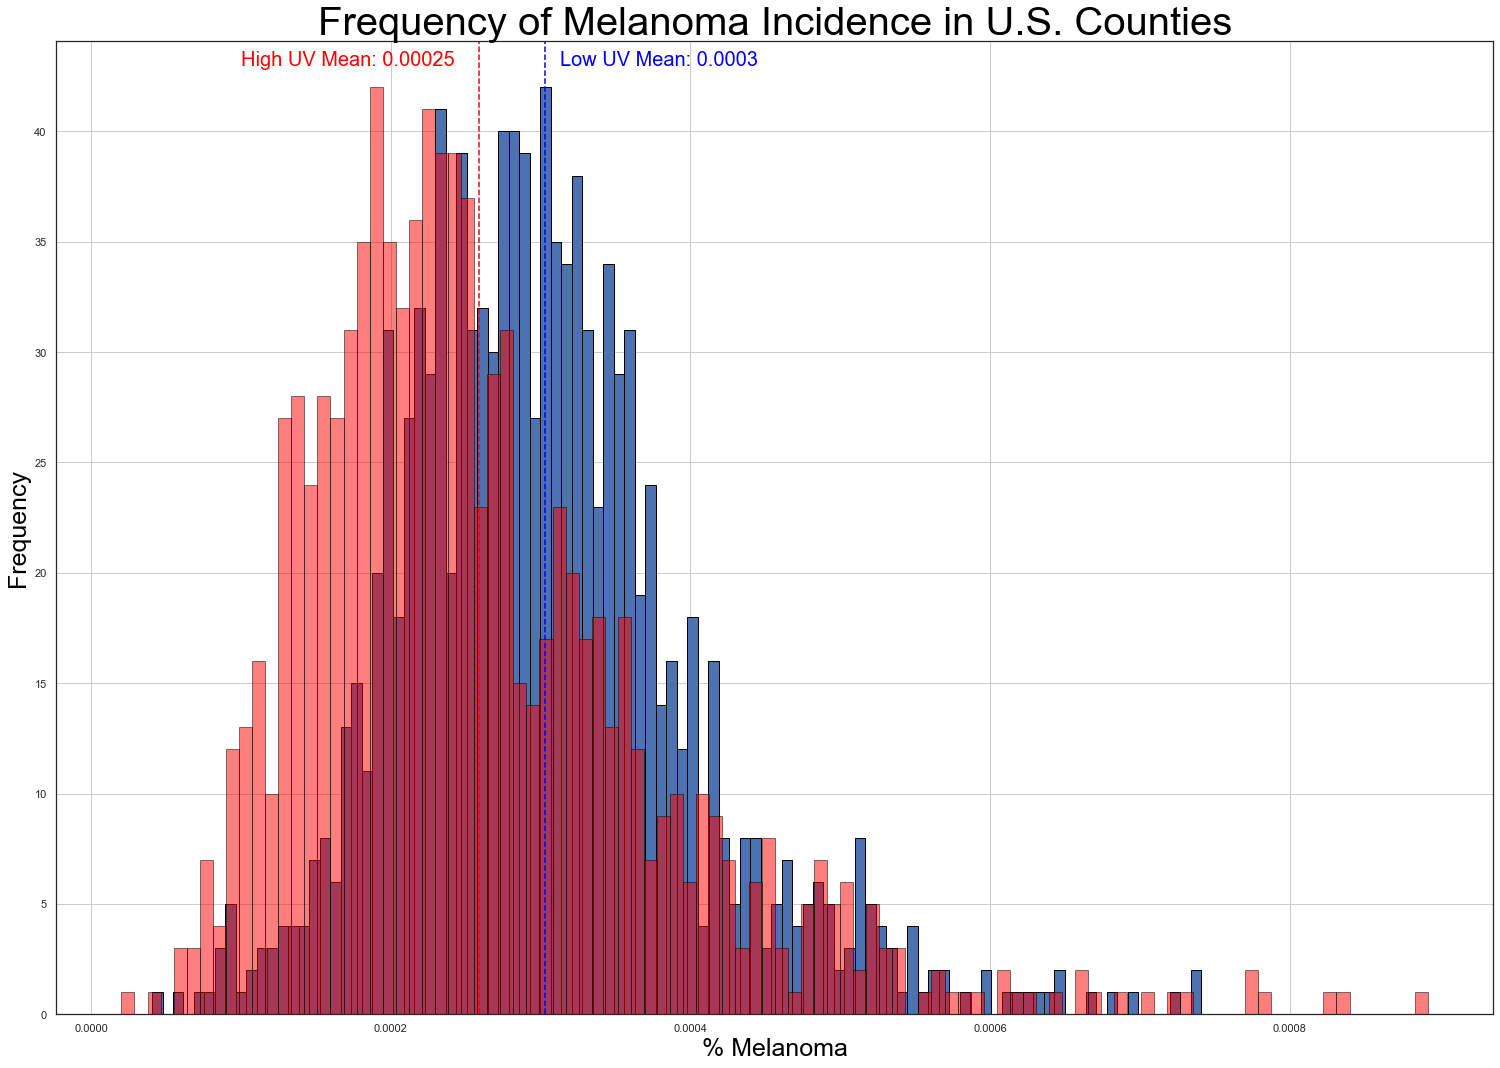

In [319]:
#high_merged['% Melanoma'].hist(bins = 100,)
#low_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 0.5)



fig, ax = plt.subplots(figsize=(21,15))
ax.hist(low, bins = 100, edgecolor='black')
ax.hist(high, bins = 100, color = 'red', alpha = 0.5, edgecolor='black')

ax.set_xlabel('% Melanoma', size=25, color='black')
ax.set_ylabel('Frequency', size=25, color='black')
ax.set_title('Frequency of Melanoma Incidence in U.S. Counties', size=40, color='black')
ax.axvline(high.mean(), color='red',  linestyle='--')
ax.axvline(low.mean(), color='blue',  linestyle='--')
ax.text(.0001, 43, 'High UV Mean: 0.00025', color='red', size=20,)
ax.text(low.mean() + .00001, 43, 'Low UV Mean: 0.0003' , color='blue', size=20)
ax.grid()
plt.tight_layout()

In [222]:
res = stats.mannwhitneyu(high, low, alternative = 'less')
print(res)
#MannwhitneyuResult(statistic=375361.0, pvalue=2.0293872103422155e-33)


res = stats.mannwhitneyu(low, high, alternative = 'two-sided')
print(res)
#MannwhitneyuResult(statistic=703679.0, pvalue=4.058774420684431e-33)

print("low:", low.mean()) # higher rate of melanoma in low UV
print("high:", high.mean()) # lower rate of melanoma in high UV

MannwhitneyuResult(statistic=375361.0, pvalue=2.0293872103422155e-33)
MannwhitneyuResult(statistic=703679.0, pvalue=4.058774420684431e-33)
low: 0.0003027473637287206
high: 0.00025865546193807785


In [224]:
stats.ttest_ind(high, low, equal_var = False)

Ttest_indResult(statistic=-9.056779333702856, pvalue=3.3232227532348115e-19)

[Text(0, 0, 'Low UV'), Text(0, 0, 'High UV')]

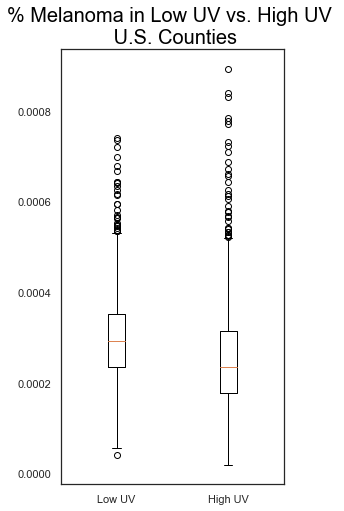

In [325]:
fig, ax = plt.subplots(1, figsize=(4, 8))
ax.boxplot([low, high])
ax.set_xticks([1,2])
ax.set_title('% Melanoma in Low UV vs. High UV \n U.S. Counties', size=20, color='black')
ax.set_xticklabels(["Low UV", "High UV"])

# .25 Quartile vs .75 Quartile

778
777
MannwhitneyuResult(statistic=89716.0, pvalue=2.0747171482420078e-16)
MannwhitneyuResult(statistic=165704.0, pvalue=4.1494342964840156e-16)
lower: 0.0002960667245324005
higher: 0.0002556266262057972
Ttest_indResult(statistic=-9.056779333702856, pvalue=3.3232227532348115e-19)


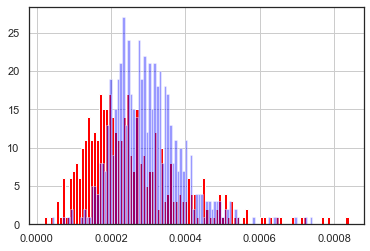

In [268]:
higher_q = UV["UV_ Wh/m_"].quantile(.75)
lower_q = UV["UV_ Wh/m_"].quantile(.25)

Higher_UV_Counties = UV[UV["UV_ Wh/m_"] >= higher_q]
Lower_UV_Counties = UV[UV["UV_ Wh/m_"] < lower_q]

print(len(Higher_UV_Counties))
print(len(Lower_UV_Counties))

lower_merged = totals.merge(Lower_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
lower = np.array(lower_merged['% Melanoma'])

higher_merged = totals.merge(Higher_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# # merged.drop(['AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
higher = np.array(higher_merged['% Melanoma'])


higher_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 1)
lower_merged['% Melanoma'].hist(bins = 100, color = 'blue', alpha = 0.4)



res = stats.mannwhitneyu(higher, lower, alternative = 'less')
print(res)

res = stats.mannwhitneyu(lower, higher, alternative = 'two-sided')
print(res)


print("lower:", lower.mean()) # higher rate of melanoma in low UV
print("higher:", higher.mean()) # lower rate of melanoma in high UV

print(stats.ttest_ind(high, low, equal_var = False))

In [ ]:
fig, ax = plt.subplots(figsize=(21,15))
ax.hist(low, bins = 100, edgecolor='black')
ax.hist(high, bins = 100, color = 'red', alpha = 0.5, edgecolor='black')

ax.set_xlabel('% Melanoma', size=25, color='black')
ax.set_ylabel('Frequency', size=25, color='black')
ax.set_title('Frequency of Melanoma Incidence in U.S. Counties', size=40, color='black')
ax.axvline(high.mean(), color='red',  linestyle='--')
ax.axvline(low.mean(), color='blue',  linestyle='--')
ax.text(.0001, 43, 'High UV Mean: 0.00025', color='red', size=20,)
ax.text(low.mean() + .00001, 43, 'Low UV Mean: 0.0003' , color='blue', size=20)
ax.grid()
plt.tight_layout()

# Bottom (.1) Quartile vs Top (.9) Quartile

312
311
MannwhitneyuResult(statistic=35710.0, pvalue=5.1477892088201496e-14)
MannwhitneyuResult(statistic=72650.0, pvalue=1.0295578417640299e-13)
lower: 0.0003040835353521393
higher: 0.0002556266262057972
Ttest_indResult(statistic=-9.056779333702856, pvalue=3.3232227532348115e-19)


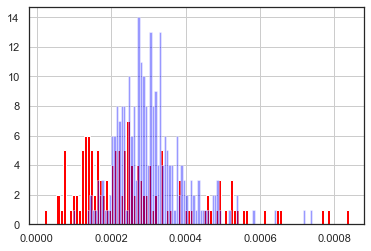

In [270]:
top_q = UV["UV_ Wh/m_"].quantile(.9)
bottom_q = UV["UV_ Wh/m_"].quantile(.1)

Highest_UV_Counties = UV[UV["UV_ Wh/m_"] >= top_q]
Lowest_UV_Counties = UV[UV["UV_ Wh/m_"] < bottom_q]

print(len(Highest_UV_Counties))
print(len(Lowest_UV_Counties))

lowest_merged = totals.merge(Lowest_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
lowest = np.array(lowest_merged['% Melanoma'])

highest_merged = totals.merge(Highest_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# # merged.drop(['AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
highest = np.array(highest_merged['% Melanoma'])


highest_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 1)
lowest_merged['% Melanoma'].hist(bins = 100, color = 'blue', alpha = 0.4)



res = stats.mannwhitneyu(higher, lower, alternative = 'less')
print(res)

res = stats.mannwhitneyu(lower, higher, alternative = 'two-sided')
print(res)


print("lower:", lower.mean()) # higher rate of melanoma in low UV
print("higher:", higher.mean()) # lower rate of melanoma in high UV

print(stats.ttest_ind(high, low, equal_var = False))

32
32
MannwhitneyuResult(statistic=61.0, pvalue=1.1021648404425783e-06)
MannwhitneyuResult(statistic=533.0, pvalue=2.2043296808851565e-06)
extremely low: 0.00035290962222522777
extremely high: 0.00019020258105994093
Ttest_indResult(statistic=-5.739935457930546, pvalue=8.202504759265414e-07)


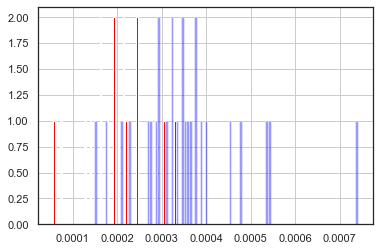

In [296]:
extreme_h = UV["UV_ Wh/m_"].quantile(.99)
extreme_l = UV["UV_ Wh/m_"].quantile(.01)

extreme_h_UV_Counties = UV[UV["UV_ Wh/m_"] >= extreme_h]
extreme_l_UV_Counties = UV[UV["UV_ Wh/m_"] < extreme_l]

print(len(extreme_h_UV_Counties))
print(len(extreme_l_UV_Counties))

extreme_l_merged = totals.merge(extreme_l_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
extreme_l = np.array(extreme_l_merged['% Melanoma'])

extreme_h_merged = totals.merge(extreme_h_UV_Counties, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='inner')
# # merged.drop(['AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
extreme_h = np.array(extreme_h_merged['% Melanoma'])


extreme_h_merged['% Melanoma'].hist(bins = 100, color = 'red', alpha = 1)
extreme_l_merged['% Melanoma'].hist(bins = 100, color = 'blue', alpha = 0.4)



res = stats.mannwhitneyu(extreme_h, extreme_l, alternative = 'less')
print(res)

res = stats.mannwhitneyu(extreme_l, extreme_h, alternative = 'two-sided')
print(res)


print("extremely low:", extreme_l.mean()) # higher rate of melanoma in low UV
print("extremely high:", extreme_h.mean()) # lower rate of melanoma in high UV

print(stats.ttest_ind(extreme_h, extreme_l, equal_var = False))

In [28]:
UT = totals[totals.STATE == "UT"]

UT['CANCER_COUNT'].sum()

UTUV = UV[UV.STATE_ABR == "UT"]
          
UTUV['UV_ Wh/m_'].mean()

4737.551724137931

In [16]:
totals.columns
UV.columns

Index(['STATENAME', 'STATE_ABR', 'COUNTY_FIPS', 'COUNTY NAME', 'UV_ Wh/m_'], dtype='object')

In [60]:
merged = totals.merge(UV, left_on='COUNTY_FIPS', right_on='COUNTY_FIPS', how='left')
# merged.drop(['FIPS','AGE_ADJUSTED_CI_UPPER', 'COUNT', 'AGE_ADJUSTED_CI_LOWER','AGE_ADJUSTED_RATE', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'], axis = 1, inplace = True)
merged

,STATE,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,...,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE,COUNTY_FIPS,CANCER_COUNT,% Melanoma,STATENAME,STATE_ABR,COUNTY NAME,UV_ Wh/m_
0,AK,AK: Anchorage Municipality (02020) - 1990+,14.3,19.0,16.5,Incidence,1495291.0,All Races,Male and Female,Melanomas of the Skin,...,12.6,16.6,14.5,2020,217,0.000145,NaN,NaN,NaN,NaN
1,AK,AK: Fairbanks North Star Borough (02090) - 1990+,10.5,18.4,14.1,Incidence,500805.0,All Races,Male and Female,Melanomas of the Skin,...,9.8,16.3,12.8,2090,64,0.000128,NaN,NaN,NaN,NaN
2,AK,AK: Juneau City and Borough (02110) - 1990+,12.7,26.9,18.8,Incidence,162472.0,All Races,Male and Female,Melanomas of the Skin,...,14.5,29.2,20.9,2110,34,0.000209,NaN,NaN,NaN,NaN
3,AK,AK: Kenai Peninsula Borough (02122) - 1990+,7.1,15.4,10.6,Incidence,288098.0,All Races,Male and Female,Melanomas of the Skin,...,7.6,15.7,11.1,2122,32,0.000111,NaN,NaN,NaN,NaN
4,AK,AK: Matanuska-Susitna Borough (02170) - 1990+,14.6,23.4,18.6,Incidence,492825.0,All Races,Male and Female,Melanomas of the Skin,...,13.2,20.7,16.6,2170,82,0.000166,NaN,NaN,NaN,NaN
5,AL,AL: Autauga County (01001),23.1,35.8,28.9,Incidence,274602.0,All Races,Male and Female,Melanomas of the Skin,...,25.7,39.5,32.0,1001,88,0.000320,Alabama,AL,Autauga,4563.0
6,AL,AL: Baldwin County (01003),28.4,34.9,31.5,Incidence,994220.0,All Races,Male and Female,Melanomas of the Skin,...,36.7,44.7,40.5,1003,403,0.000405,Alabama,AL,Baldwin,4492.0
7,AL,AL: Barbour County (01005),7.6,20.1,12.7,Incidence,132909.0,All Races,Male and Female,Melanomas of the Skin,...,9.2,23.2,15.0,1005,20,0.000150,Alabama,AL,Barbour,4642.0
8,AL,AL: Bibb County (01007),7.5,21.2,13.1,Incidence,112888.0,All Races,Male and Female,Melanomas of the Skin,...,8.8,24.1,15.1,1007,17,0.000151,Alabama,AL,Bibb,4499.0
9,AL,AL: Blount County (01009),18.4,29.5,23.5,Incidence,287916.0,All Races,Male and Female,Melanomas of the Skin,...,21.1,33.4,26.7,1009,77,0.000267,Alabama,AL,Blount,4416.0


In [76]:
merged["% Melanoma"].mean()
# merged.drop(index = [56, 106,213, 853, 941, 1174, 1603, 1804],axis = 1, inplace = True)
# merged_d = merged[merged['% Melanoma'] >0.008]
merged.max()

STATE                                          WY
AREA                     WY: Uinta County (56041)
AGE_ADJUSTED_CI_LOWER                         9.9
AGE_ADJUSTED_CI_UPPER                        92.2
AGE_ADJUSTED_RATE                             9.9
EVENT_TYPE                              Incidence
POPULATION                            5.03213e+07
RACE                                    All Races
SEX                               Male and Female
SITE                        Melanomas of the Skin
YEAR                                    2012-2016
CRUDE_CI_LOWER                                9.9
CRUDE_CI_UPPER                               99.0
CRUDE_RATE                                    9.9
COUNTY_FIPS                                 56041
CANCER_COUNT                                 9202
% Melanoma                            0.000892239
UV_ Wh/m_                                    5723
dtype: object

In [119]:
top_ten = merged[merged['% Melanoma'] > 0.000721]
top_ten.sort_values(by = ['% Melanoma'], ascending = False)

,STATE,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,...,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE,COUNTY_FIPS,CANCER_COUNT,% Melanoma,STATENAME,STATE_ABR,COUNTY NAME,UV_ Wh/m_
384,GA,GA: Towns County (13281),38.7,80.1,56.4,Incidence,54918.0,All Races,Male and Female,Melanomas of the Skin,...,66.0,118.0,89.2,13281,49,0.000892,Georgia,GA,Towns,4331.0
1819,UT,UT: Beaver County (49001),55.1,123.6,84.4,Incidence,32191.0,All Races,Male and Female,Melanomas of the Skin,...,55.3,122.0,83.9,49001,27,0.000839,Utah,UT,Beaver,4949.0
369,GA,GA: Pickens County (13227),46.9,68.9,57.0,Incidence,149407.0,All Races,Male and Female,Melanomas of the Skin,...,69.0,99.0,83.0,13227,124,0.000830,Georgia,GA,Pickens,4409.0
206,CO,CO: Ouray County (08091),28.3,92.2,52.5,Incidence,22967.0,All Races,Male and Female,Melanomas of the Skin,...,46.4,123.9,78.4,8091,18,0.000784,Colorado,CO,Ouray,5010.0
1834,UT,UT: Summit County (49043),60.8,86.5,72.8,Incidence,195448.0,All Races,Male and Female,Melanomas of the Skin,...,65.9,91.2,77.8,49043,152,0.000778,Utah,UT,Summit,4511.0
276,FL,FL: Sarasota County (12115),36.8,41.6,39.1,Incidence,1991723.0,All Races,Male and Female,Melanomas of the Skin,...,73.3,81.1,77.1,12115,1536,0.000771,Florida,FL,Sarasota,4865.0
1960,WA,WA: Jefferson County (53031),32.7,52.6,41.6,Incidence,151166.0,All Races,Male and Female,Melanomas of the Skin,...,61.0,89.2,74.1,53031,112,0.000741,Washington,WA,Jefferson,3044.0
1230,NJ,NJ: Cape May County (34009),41.4,52.3,46.5,Incidence,475578.0,All Races,Male and Female,Melanomas of the Skin,...,66.1,81.7,73.6,34009,350,0.000736,New Jersey,NJ,Cape May,4061.0
386,GA,GA: Union County (13291),32.1,54.1,41.8,Incidence,109181.0,All Races,Male and Female,Melanomas of the Skin,...,58.1,91.2,73.3,13291,80,0.000733,Georgia,GA,Union,4340.0
144,CA,CA: Marin County (06041),48.2,55.3,51.7,Incidence,1299494.0,All Races,Male and Female,Melanomas of the Skin,...,67.8,77.1,72.3,6041,940,0.000723,California,CA,Marin,4595.0


In [126]:
bottom_ten = merged[merged['% Melanoma'] < 0.0000725]
bottom_ten.sort_values(by = ['% Melanoma'], ascending = True)

,STATE,AREA,AGE_ADJUSTED_CI_LOWER,AGE_ADJUSTED_CI_UPPER,AGE_ADJUSTED_RATE,EVENT_TYPE,POPULATION,RACE,SEX,SITE,...,CRUDE_CI_LOWER,CRUDE_CI_UPPER,CRUDE_RATE,COUNTY_FIPS,CANCER_COUNT,% Melanoma,STATENAME,STATE_ABR,COUNTY NAME,UV_ Wh/m_
1811,TX,TX: Webb County (48479),1.7,3.9,2.7,Incidence,1333290.0,All Races,Male and Female,Melanomas of the Skin,...,1.3,2.9,2.0,48479,27,0.000020,Texas,TX,Webb,4934.0
1754,TX,TX: Hidalgo County (48215),4.2,5.8,5.0,Incidence,4143761.0,All Races,Male and Female,Melanomas of the Skin,...,3.5,4.7,4.1,48215,168,0.000041,Texas,TX,Hidalgo,4782.0
1277,NY,NY: Bronx County (36005) - 1980+,3.8,4.8,4.3,Incidence,7225933.0,All Races,Male and Female,Melanomas of the Skin,...,3.6,4.6,4.1,36005,294,0.000041,New York,NY,Bronx,3920.0
1718,TX,TX: Cameron County (48061),5.0,7.2,6.0,Incidence,2092648.0,All Races,Male and Female,Melanomas of the Skin,...,4.7,6.8,5.7,48061,119,0.000057,Texas,TX,Cameron,4736.0
1734,TX,TX: El Paso County (48141),5.3,6.9,6.1,Incidence,4164843.0,All Races,Male and Female,Melanomas of the Skin,...,5.0,6.5,5.7,48141,237,0.000057,Texas,TX,El Paso,5713.0
848,MD,MD: Prince Georges County (24033),5.3,6.9,6.1,Incidence,4495899.0,All Races,Male and Female,Melanomas of the Skin,...,5.0,6.5,5.7,24033,257,0.000057,Maryland,MD,Prince George's,4102.0
1254,NM,NM: Lea County (35025),3.8,9.6,6.2,Incidence,344921.0,All Races,Male and Female,Melanomas of the Skin,...,3.5,9.0,5.8,35025,20,0.000058,New Mexico,NM,Lea,5375.0
1258,NM,NM: McKinley County (35031),4.8,11.0,7.4,Incidence,364008.0,All Races,Male and Female,Melanomas of the Skin,...,4.4,10.1,6.9,35031,25,0.000069,New Mexico,NM,McKinley,5406.0
308,GA,GA: Clayton County (13063),8.1,12.6,10.2,Incidence,1351374.0,All Races,Male and Female,Melanomas of the Skin,...,5.8,8.7,7.1,13063,96,0.000071,Georgia,GA,Clayton,4570.0
111,AZ,AZ: Apache County (04001),4.4,10.1,6.8,Incidence,358621.0,All Races,Male and Female,Melanomas of the Skin,...,4.7,10.6,7.2,4001,26,0.000072,Arizona,AZ,Apache,5329.0


In [132]:
merged.mean()

100- 0.000020/ 0.000282   *100

92.90780141843972

In [127]:
0.000072 * 100000

7.2

In [110]:
0.000282  * 100000


28.200000000000003

merged['POPULATION']  vs.  merged['UV_Wh/m_']   per merged['COUNTY_FIPS']

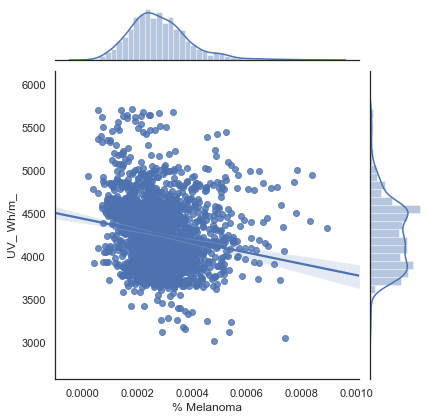

In [77]:
import numpy as np, pandas as pd
import seaborn as sns; sns.set(style="white", color_codes=True)
g = sns.jointplot(x= "% Melanoma", y="UV_ Wh/m_", data=merged, kind = 'reg')


In [289]:
merger = np.array(merged['% Melanoma'])
type(merged['COUNTY_FIPS'].tolist()
# merged['% Melanoma'].max()
# merged['% Melanoma'].hist(bins = 100)

SyntaxError: unexpected EOF while parsing (<ipython-input-289-7280517b342b>, line 4)

In [290]:
(merged['% Melanoma']*100000).tolist()



[14.512225379541507,
 12.779425125547869,
 20.926682751489487,
 11.107331533020014,
 16.63876629635266,
 32.04637985156699,
 40.53428818571342,
 15.047889909637421,
 15.059173694281057,
 26.743911418608203,
 17.73521326593952,
 19.478493502284845,
 20.606781397375283,
 20.869403907989117,
 21.04675582560475,
 27.376744260948684,
 29.850394535806725,
 30.487468915637866,
 33.456360691431456,
 33.15410894728497,
 43.83880127969894,
 26.206824257036534,
 13.503412022859349,
 20.264736262901177,
 40.893308119923965,
 18.549532551779695,
 28.810976788794274,
 19.1019686966488,
 33.60811667723526,
 42.73984928579463,
 40.906487768960154,
 26.946032870310667,
 27.399971077808306,
 18.265821098722515,
 35.50884170158369,
 34.76841214173419,
 34.09152078087525,
 12.212597944385909,
 26.584373262323517,
 24.376636195871423,
 18.053800324968403,
 23.188328982761135,
 23.92243204335676,
 25.00700002896564,
 19.09333915225574,
 18.10743864127406,
 34.00107195497789,
 19.002280273632838,
 25.8632615

In [295]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]


endpts = [(merged['% Melanoma']*100000).min(), ((merged['% Melanoma']*100000).max())*.25, (merged['% Melanoma']*100000).mean(), ((merged['% Melanoma']*100000).max())*.75]
fips = merged['COUNTY_FIPS'].tolist()
values = (merged['% Melanoma']*100000).tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale = colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker=None,
    asp=2.9, 
    title='USA by % Melanoma',
    legend_title='% Melanoma',
    round_legend_values=True
)

fig.layout.template = None
fig.show()

In [38]:
import plotly.figure_factory as ff
import plotly
import geopandas
import numpy as np
import pandas as pd


merged_r = merged[merged['STATENAME'] == 'Florida']

values = merged_r['% Melanoma'].tolist()
fips = merged_r['COUNTY_FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])
autocolorscale = True
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Florida'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='Cancer Incidence in Black Females by County',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=True,
)
fig.layout.template = None
fig.show()

ValueError: math domain error

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations= grouped.index,
    z = grouped['POPULATION'],
    locationmode = 'USA-states',
    colorscale = 'Reds',
    autocolorscale = False,
    colorbar_title = 'Cancer Incidence in Black Females by County',
))
fig.update_layout(
    title_text = 'Cancer Incidence in Black Females by County',
    geo_scope='usa',
)
fig.show()

UV data: 3108
Cancer data: 3152


USGS says:

There are 3,141 counties and county equivalents in the 50 States and the District of Columbia:

3,007 entities named "County"
16 Boroughs in Alaska
11 Census Areas in Alaska (for areas not organized into Boroughs by the State)
64 Parishes in Louisiana
42 Independent Cities (1 in Maryland, 1 in Missouri, 1 in Nevada, and the remainder in Virginia)
1 District - the Federal District or District of Columbia
This does not include Commonwealths and territories and their 121 county equivalents:

Puerto Rico - 78 Municipios
U.S. Virgin Islands - 2 Districts
Guam - 19 Election Districts
Northern Mariana Islands - 17 Districts
American Samoa - 5 Districts

In [6]:
import plotly.figure_factory as ff

import numpy as np
import pandas as pd

UV_CAL = UV[UV['STATENAME'] == 'California']

values = UV_CA['UV_ Wh/m_'].tolist()
fips = UV_CA['COUNTY_FIPS'].tolist()

colorscale = [
    'rgb(193, 193, 193)',
    'rgb(239,239,239)',
    'rgb(195, 196, 222)',
    'rgb(144,148,194)',
    'rgb(101,104,168)',
    'rgb(65, 53, 132)'
]

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA', 'AZ', 'Nevada', 'Oregon', ' Idaho'],
    binning_endpoints=[14348, 63983, 134827, 426762, 2081313], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend_title='Population by County', title='California and Nearby States'
)
fig.layout.template = None
fig.show()

NameError: name 'UV' is not defined

In [ ]:
import geopandas
import geoplot
california = geopandas.read_file(
    "data/ca-state-boundary/CA_State_TIGER2016.shx"
)
california = california.to_crs({'init': 'epsg:4326'}) # sets it from Mercator to long/lat style projection





this is the geopands site, it'll probably be more useful to you than my code snippit

In [ ]:
# #Death from Cancer
# mortality = b[b.EVENT_TYPE == 'Mortality']

# #Gender Breakdown
# female_mort = mortality[mortality.SEX == 'Female']
# male_mort = mortality[mortality.SEX == 'Male']
# total_mort_w_all = mortality[mortality.SEX == 'Male and Female']

# #Racial Breakdown
# All_Races_mort  = mortality[mortality.RACE == 'All Races']
# White_mort  = mortality[mortality.RACE == 'White']
# Hispanic_mort  = mortality[mortality.RACE == 'Hispanic']
# Black_mort  = mortality[mortality.RACE == 'Black']
# Asian_PI_mort  = mortality[mortality.RACE == 'Asian/Pacific Islander']
# AIndianAN_mort  = mortality[mortality.RACE == 'American Indian/Alaska Native']

# #Gender & Racial Breakdown (Per County)
# All_Races_fem_mort  = All_Races_mort[All_Races_mort.SEX == 'Female']
# All_Races_male_mort  = All_Races_mort[All_Races_mort.SEX == 'Male']
# All_Races_total_mort = All_Races_mort[All_Races_mort.SEX == 'Male and Female']

# White_fem_mort  = White_mort[White_mort.SEX == 'Female']
# White_male_mort  = White_mort[White_mort.SEX == 'Male']
# White_total_mort = White_mort[White_mort.SEX == 'Male and Female']

# Hispanic_fem_mort  = Hispanic_mort[Hispanic_mort.SEX == 'Female']
# Hispanic_male_mort  = Hispanic_mort[Hispanic_mort.SEX == 'Male']
# Hispanic_total_mort = Hispanic_mort[Hispanic_mort.SEX == 'Male and Female']

# Black_fem_mort  = Black_mort[Black_mort.SEX == 'Female']
# Black_male_mort  = Black_mort[Black_mort.SEX == 'Male']
# Black_total_mort = Black_mort[Black_mort.SEX == 'Male and Female']

# Asian_PI_fem_mort  = Asian_PI_mort[Asian_PI_mort.SEX == 'Female']
# Asian_PI_male_mort  = Asian_PI_mort[Asian_PI_mort.SEX == 'Male']
# Asian_total_mort = Asian_PI_mort[Asian_PI_mort.SEX == 'Male and Female']

# AIndianAN_fem_mort  = AIndianAN_mort[AIndianAN_mort.SEX == 'Female']
# AIndianAN_male_mort  = AIndianAN_mort[AIndianAN_mort.SEX == 'Male']
# AIndianAN_total_mort = AIndianAN_mort[AIndianAN_mort.SEX == 'Male and Female']